In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir,'..')))

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scripts.data_load import load_data
from scripts.data_visualization import *

In [3]:
data = load_data('../data/MachineLearningRating_v3.txt')

c:\Users\USER\Documents\10X Exercises\Week-3_AlphaCare_Insurance_Solutions\scripts\data_load.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path, sep="|")


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

In [ ]:
plot_univariate(data, 'TotalPremium')

In [ ]:
cover_category = data['CoverCategory'].value_counts()
plot_visual(cover_category, 'CoverCategory', 'Frequency','Cover Category Summary', 'bar', 'blue')

In [4]:
data['Date'] = pd.to_datetime(data['TransactionMonth'])

In [5]:
df = data.sort_values(by=['PostalCode', 'Date'])

In [6]:
df['TotalPremium_Change'] = df.groupby('PostalCode')['TotalPremium'].pct_change()
df['TotalClaims_Change'] = df.groupby('PostalCode')['TotalClaims'].pct_change()

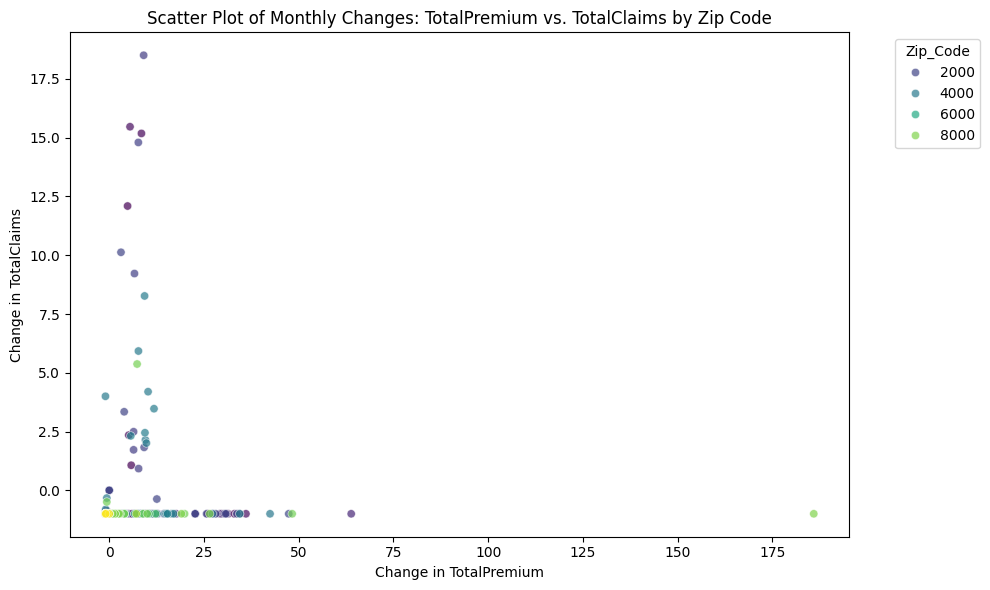

In [7]:
# Ensure the columns 'TotalPremium_Change' and 'TotalClaims_Change' exist
if 'TotalPremium_Change' not in df.columns or 'TotalClaims_Change' not in df.columns:
	df['TotalPremium_Change'] = df.groupby('PostalCode')['TotalPremium'].diff()
	df['TotalClaims_Change'] = df.groupby('PostalCode')['TotalClaims'].diff()
	df = df.dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium_Change', y='TotalClaims_Change', hue='PostalCode', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Monthly Changes: TotalPremium vs. TotalClaims by Zip Code')
plt.xlabel('Change in TotalPremium')
plt.ylabel('Change in TotalClaims')
plt.legend(title='Zip_Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

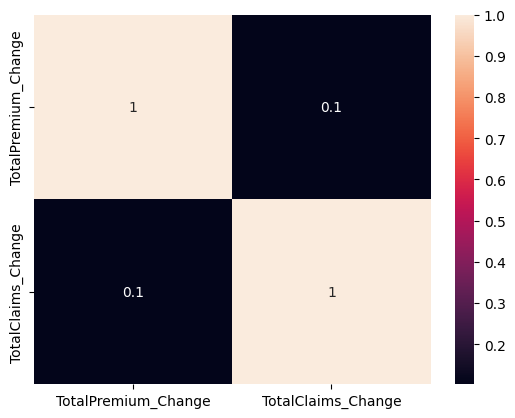

In [8]:
corr_data = df[['TotalPremium_Change', 'TotalClaims_Change']].corr()

sns.heatmap(corr_data, annot=True)
plt.show()

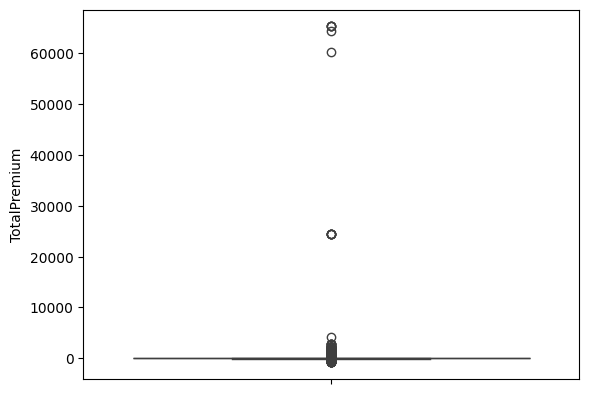

In [9]:
sns.boxplot(data=data, y='TotalPremium')
plt.show()